# TFM: Algoritmos supervisados

Esto es una copia de algunas celdas del jupyter notebook original. Solo las necesarias para poder hacer esta parte.

In [1]:
from astropy.io import fits
from astropy.table import Table
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Leemos el catálogo con el que vamos a trabajar

In [2]:
cat = fits.open('ANF40pau_PAUS-COSMOS-radec-narrow-fluxes-err.fits')

In [3]:
#cat.info()

In [4]:
#cat[1].columns

In [5]:
tab = Table(cat[1].data)

In [6]:
#tab

Solo me interesan algunas columnas, convierto la tabla a pandas y filtro.

In [7]:
DF = tab.to_pandas()
#list(DF)

Columnas de interés con sus errores

In [8]:
Tab = DF[['ref_id','ra', 'dec', 'zspec', 'photoz','type', 'u_cfht', 'B_Subaru', 'V_Subaru', 'r_Subaru', 'i_Subaru', 'suprime_FDCCD_z', 'Y_uv', 'J_uv','H_uv','K_uv','err_u_cfht', 'err_B_Subaru', 'err_V_Subaru', 'err_r_Subaru', 'err_i_Subaru', 'err_suprime_FDCCD_z', 'err_Y_uv', 'err_J_uv','err_H_uv','err_K_uv']]
#Tab

### Normalizar flujos

In [9]:
#Primero genero cuatro listas con los nombres de las columnas los flujos, sus errores, y los mismos normalizados
filtros = ['u_cfht', 'B_Subaru', 'V_Subaru', 'r_Subaru', 'i_Subaru', 'suprime_FDCCD_z', 'Y_uv', 'J_uv','H_uv','K_uv']
errfiltros = ['err_u_cfht', 'err_B_Subaru', 'err_V_Subaru', 'err_r_Subaru', 'err_i_Subaru', 'err_suprime_FDCCD_z', 'err_Y_uv', 'err_J_uv','err_H_uv','err_K_uv']
nerrfiltros = ['nerr_u_cfht', 'nerr_B_Subaru', 'nerr_V_Subaru', 'nerr_r_Subaru', 'nerr_i_Subaru', 'nerr_suprime_FDCCD_z', 'nerr_Y_uv', 'nerr_J_uv','nerr_H_uv','nerr_K_uv']
nfiltros = ['n_u_cfht', 'n_B_Subaru', 'n_V_Subaru', 'n_r_Subaru', 'n_i_Subaru', 'n_suprime_FDCCD_z', 'n_Y_uv', 'n_J_uv','n_H_uv','n_K_uv']

m=Tab[filtros]**2 #Tab[filtros]**2 es un df con las columnas de los filtros al cuadrado, se lo asigno a m
#m.sum(axis=1) devuelve la suma de las columnas de cada fila del df m. De manera que m.sum(axis=1)[0] p.ej. es la suma de
#la primera fila, esto es: el módulo^2 de los filtros de la primera fila.
Tab['módulo_filtros']=np.sqrt(m.sum(axis=1))#añado nueva columna con el módulo de filtros de cada galaxia.
for i in range(len(filtros)):
    Tab[nfiltros[i]] = Tab[filtros[i]]/Tab['módulo_filtros']
    Tab[nerrfiltros[i]] = Tab[errfiltros[i]]/Tab['módulo_filtros']   
    
#Normalizar errores es algo que hay que pensar 2 veces pero hecho está.
#colist=list(Tab) asigna a la variable colist una lista con los encabezados de las columnas, no me hace falta ahora

C:\Users\Daniel\AppData\Local\Temp\ipykernel_23308\2390807918.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tab['módulo_filtros']=np.sqrt(m.sum(axis=1))#añado nueva columna con el módulo de filtros de cada galaxia.
C:\Users\Daniel\AppData\Local\Temp\ipykernel_23308\2390807918.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tab[nfiltros[i]] = Tab[filtros[i]]/Tab['módulo_filtros']
C:\Users\Daniel\AppData\Local\Temp\ipykernel_23308\2390807918.py:13: SettingWithCopyWarning: 
A value is trying to be 

## Magnitudes

In [10]:
#magnitudes 
filtros = ['u_cfht', 'B_Subaru', 'V_Subaru', 'r_Subaru', 'i_Subaru', 'suprime_FDCCD_z', 'Y_uv', 'J_uv','H_uv','K_uv']
magnitudes = ['m_u_cfht', 'm_B_Subaru', 'm_V_Subaru', 'm_r_Subaru', 'm_i_Subaru', 'm_suprime_FDCCD_z', 'm_Y_uv', 'm_J_uv','m_H_uv','m_K_uv']

for i in range(len(filtros)):
    Tab[magnitudes[i]]=-48.6-2.5*np.log10(Tab[filtros[i]])
    
#colores con filtros consecutivos
#basta con hacer la resta de las columnas magnitudes consecutivamente
colores = ['u-B', 'B-V', 'V-r', 'r-i', 'i-z', 'z-Y', 'Y-J', 'J-H', 'H-K'] #9 elementos
for i in range(len(colores)): #esto itera de 0 a 8 (9elementos)
    Tab[colores[i]] = Tab[magnitudes[i]]-Tab[magnitudes[i+1]]

C:\Users\Daniel\AppData\Local\Temp\ipykernel_23308\813830713.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tab[magnitudes[i]]=-48.6-2.5*np.log10(Tab[filtros[i]])
C:\Users\Daniel\AppData\Local\Temp\ipykernel_23308\813830713.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tab[magnitudes[i]]=-48.6-2.5*np.log10(Tab[filtros[i]])
C:\Users\Daniel\AppData\Local\Temp\ipykernel_23308\813830713.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

## Componentes principales
calcular las componentes ppales a partir de las magnitudes

después hacer plot de densidad, y plot con las varibles que sean y colores de catálogo.

Después correr otro algoritmo de clasificación

In [11]:
magnitudes

['m_u_cfht',
 'm_B_Subaru',
 'm_V_Subaru',
 'm_r_Subaru',
 'm_i_Subaru',
 'm_suprime_FDCCD_z',
 'm_Y_uv',
 'm_J_uv',
 'm_H_uv',
 'm_K_uv']

In [12]:
Tab[magnitudes]

,m_u_cfht,m_B_Subaru,m_V_Subaru,m_r_Subaru,m_i_Subaru,m_suprime_FDCCD_z,m_Y_uv,m_J_uv,m_H_uv,m_K_uv
0,22.928679,22.324074,21.713651,20.990942,20.325008,19.918392,19.727191,19.467156,19.042987,18.796103
1,21.811980,20.885876,19.549214,19.122280,18.602434,18.294497,18.089135,17.752083,17.516818,17.399786
2,22.707770,22.761947,22.681971,22.364661,21.787727,22.383147,21.867179,22.220564,22.102670,22.297836
3,21.711525,21.585085,20.998429,20.771962,20.650277,20.436990,20.435621,20.283513,20.191344,20.090657
4,24.191150,24.137852,23.785692,23.349074,22.407606,21.875217,21.666035,21.305032,20.999595,20.705534
...,...,...,...,...,...,...,...,...,...,...
12108,22.148709,22.001913,21.335046,21.039228,20.881345,20.655862,20.627623,20.455734,20.329540,20.242919
12109,22.482160,22.352510,21.729849,21.412600,21.186612,20.927324,20.911642,20.699974,20.477303,20.347146
12110,23.836356,23.820151,23.572623,23.373692,22.730631,22.434747,22.323557,22.007195,22.010798,21.778409
12111,23.895685,24.078303,23.922817,23.720273,23.060157,22.676771,22.648711,22.238681,22.265945,22.241645


In [13]:
M=Tab[magnitudes]
S=M.to_numpy()
cov_mat = np.cov(S.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)
#  Hacemos una lista de parejas (autovector, autovalor)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
# Ordenamos estas parejas den orden descendiente con la funcion sort
eig_pairs.sort(key=lambda x: x[0], reverse=True)
# Visualizamos la lista de autovalores en orden desdenciente
print('Autovalores en orden descendiente:')
for i in eig_pairs:
    print(i[0])
# A partir de los autovalores, calculamos la varianza explicada
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('varianza explicada:',var_exp)
print('varianza explicada acumulada',cum_var_exp)
#Generamos la matriz a partir de los pares autovalor-autovector
#matrix_w = np.hstack((eig_pairs[0][1].reshape(10,1),
                     # eig_pairs[1][1].reshape(10,1)))
#print('Matriz W:\n', matrix_w)
#'''
#matrix_w = eig_vecs[:2].transpose()
#print('Matriz W:\n', matrix_w)
#'''
#P = S.dot(matrix_w)
P=np.zeros((len(Tab), len(magnitudes)), dtype='double')
for i in range(len(Tab)):  #numero de galaxias
    for j in range(len(magnitudes)):
         P[i,j]=np.inner(eig_vecs[j],S[i]) 

Eigenvectors 
[[-0.25042513 -0.58656227  0.58570805  0.27842443  0.36769375 -0.12794242
   0.04994506  0.0619082  -0.12129563 -0.00708201]
 [-0.29363809 -0.45231432  0.09367751 -0.25893797 -0.64549018  0.39183458
  -0.05796733 -0.18016926  0.16503444  0.01070631]
 [-0.3339251  -0.27434879 -0.37882888 -0.41192759  0.03956286 -0.60468129
  -0.1102301   0.30716578  0.11698905 -0.11242107]
 [-0.3370441  -0.13850295 -0.46910048 -0.13141338  0.46445347  0.36844037
   0.30727017 -0.31784407 -0.22788002  0.17623572]
 [-0.32290725  0.03474076 -0.26760859  0.46085999  0.02011226  0.3147036
  -0.59272158  0.39637195 -0.04927863  0.01472662]
 [-0.32039608  0.13325209 -0.10000467  0.41831505 -0.05446699 -0.30028623
  -0.06587213 -0.63327374  0.31393749 -0.31230088]
 [-0.32055772  0.18123484 -0.00957421  0.28445173 -0.17617289  0.02620027
   0.6773818   0.42203703  0.31793163  0.11673483]
 [-0.32266988  0.24423172  0.12178065  0.03845519 -0.3091369  -0.32314988
  -0.04816244 -0.13560865 -0.55534354 

In [14]:
P.shape

(12113, 10)

In [15]:
Tab.shape

(12113, 66)

Pego las dos primeras componentes al data frame con los datos.

In [16]:
Tab=pd.concat([Tab, pd.DataFrame(P[:,0:2])], axis=1)

In [17]:
#Tab

Hacemos diagrama de densidad con las dos primeras componentes de los autovectores, que explican el 98% de la varianza de los datos.

In [18]:
ppalcomps=[0,1]
#Tab[ppalcomps]

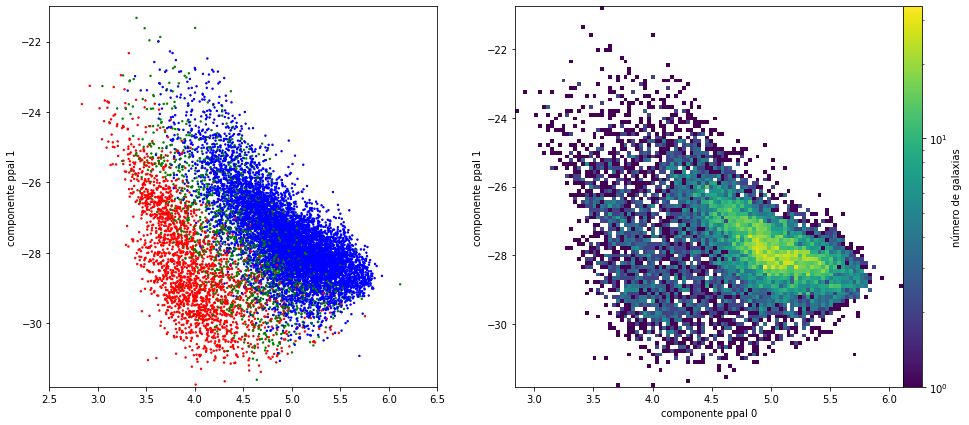

In [19]:
from matplotlib.colors import LogNorm
colors = {0:'red', 1:'green', 2:'blue'}
fig, ax=plt.subplots(1,2, figsize=(18,7))
ax[0].scatter(P[:,0], P[:,1], c=Tab['type'].map(colors), s=2)
ax[0].set_xlabel('componente ppal 0')
ax[0].set_ylabel('componente ppal 1')
ax[0].set_xlim([2.5,6.5])
ax[0].set_ylim([-31.8, -21])

ax[1].hist2d(P[:,0],P[:,1], bins=100, norm=LogNorm())#vmax=30);
ax[1].set_xlabel('componente ppal 0')
ax[1].set_ylabel('componente ppal 1')
ax[1].set_xlim([2.5,6.5])
ax[1].set_ylim([-31.8, -21])

fig.colorbar(ax[1].hist2d(P[:,0],P[:,1], bins=100, norm=LogNorm())[3], ax=ax, location='right', pad=0.0001, label='número de galaxias')

#Salvo las dos imágenes por separado
# Save just the portion _inside_ the second axis's boundaries. Esto es muy justo no salen los ejes pero al salvar se amplia con
#.expanded(1.1, 1.2) 10% eje X 20%eje Y
#extent1 = ax[0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
#extent2 = ax[1].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
#plt.savefig('Figuras para Latex/Componentes principales/ppalcomps.png', bbox_inches=extent1.expanded(1.1,1.2)
#No mola tanto porque no tengo control bueno mejor poniendo las medidas en inches directamente como he hecho abajo
#en el input de savefig(bbox_inches=matplotlib.transforms.Bbox.from_extents(xmin, ymin, xmax, ymax)) en inches de la figura full

plt.savefig('Figuras para Latex/Componentes principales/ppalcomps.png', bbox_inches=mp.transforms.Bbox.from_extents(0,0,8,7))
plt.savefig('Figuras para Latex/Componentes principales/ppalcompsdensity.png', bbox_inches=mp.transforms.Bbox.from_extents(8.1,0,16.1,7));
#plt.savefig('Figuras para Latex/Componentes principales/ppalcomps.png');

Una vez hechos estos calculos preparatorios, probamos a clasificar con diferentes algoritmos supervisados

___
***
___

# Algoritmos supervisados

En estos algortimos se usa una parte de los datos para training y otra para test. Esta separación de los datos está implementada en scikit learn. Como tengo muchas azules seguro que tengo problemas si dejo que se haga automáticamente. Habrá muchas azules.

#### K Nearest-Neighbors
##### con redshift
Primero vamos a usar K-Nearest Neighbors. Knn. Clasifica un punto test, según la etiqueta del número K de vecinos escogido. Mide distancias por lo que el uso de features muy diferentes creo que puede ser problemático. Por ejemplo a la hora de dar el redshift como feature.

In [20]:
#Separamos nuestros datos para train y test le doy las magnitudes y el redshift.
#from sklearn.model_selection import train_test_split
#magnitudes = ['m_u_cfht', 'm_B_Subaru', 'm_V_Subaru', 'm_r_Subaru', 'm_i_Subaru', 'm_suprime_FDCCD_z', 'm_Y_uv', 'm_J_uv','m_H_uv','m_K_uv']
#z=['zspec']
#mag_z=magnitudes+z  #lista con los nombres de las columnas con magnitudes y el redshift
#X_train, X_test, y_train, y_test = train_test_split(Tab[mag_z].to_numpy(), Tab['type'].to_numpy())
#X_train, X_test, y.. son numpy arrays. Están las magniutdes primero y después el redshift

In [21]:
#from sklearn.neighbors import KNeighborsClassifier
#knn = KNeighborsClassifier(n_neighbors=5)
#knn.fit(X_train, y_train)

Me gustaría comprobar que muestra está tomando para entrenar y ver si habrá mucho problema por estar muy sobremuestreadas las azules respecto las otras. Creo DF con galaxias train, y otro DF con galaxias test. Al data frame de test añadiré una columna con la clasificación dada por el algoritmo.

In [22]:
#TrainDF=pd.DataFrame(X_train, columns=mag_z)
#TrainDF['type']=y_train
#TestDF=pd.DataFrame(X_test, columns=mag_z)
#TestDF['type']=y_test
#TestDF

In [23]:
#colors = {0:'red', 1:'green', 2:'blue'}
#plt.bar(['red', 'green', 'blue'], (count()))#, color=TrainDF['type'].map(colors))
#plt.xlabel('type')
#plt.ylabel('Número de galaxias')
#plt.title('Tipos de galaxias');

In [24]:
#redtrain=TrainDF.loc[TrainDF['type']==0]
#greentrain=TrainDF.loc[TrainDF['type']==1]
#bluetrain=TrainDF.loc[TrainDF['type']==2]
#
#plt.hist([redtrain['type'],greentrain['type'],bluetrain['type']],bins=3, rwidth=1.2, color=['red','green','blue'])
#plt.xticks([0.1,1,1.9],['red','green','blue'])
#plt.xlabel('type')
#plt.ylabel('Número de galaxias')
#plt.title('Tipos de galaxias');
#
#print(TrainDF.shape[0], ' galaxias totales')
#print(redtrain.shape[0], ' rojas que son el ' ,round(redtrain.shape[0]/TrainDF.shape[0]*100,2), '% del total')
#print(greentrain.shape[0], ' verdes que son el ' ,round(greentrain.shape[0]/TrainDF.shape[0]*100,2), '% del total')
#print(bluetrain.shape[0], ' azules que son el ' , round(bluetrain.shape[0]/TrainDF.shape[0]*100,2), '% del total')
## Mostrar también muestra de test, redshifts
## También test y pred

In [25]:
#plt.hist([bluetrain['zspec'], redtrain['zspec'],greentrain['zspec']], bins=12,color=['blue','red','green'], align='left') #royal, indian, lime
#plt.xlabel('redshift zspec')
#plt.ylabel('Número de galaxias')
#plt.title('Número de galaxias según tipo y redshift');
#print('Las galaxias se encuentran a redshift ', round(TrainDF['zspec'].mean(),4), 'de media')
#print('Las rojas a redshift ', round(redtrain['zspec'].mean(),4), ' promedio')
#print('Las azules a redshift ', round(bluetrain['zspec'].mean(),4), ' promedio')
#print('Las verdes a redshift ', round(greentrain['zspec'].mean(),4), ' promedio')
#print('El máximo redshift del catálogo es ', round(max(TrainDF['zspec']),4), ' el mínimo ', min(TrainDF['zspec']))

In [26]:
#y_pred = knn.predict(X_test)

In [27]:
#TestDF['predtype']=y_pred

In [28]:
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import classification_report

In [29]:
#confusion_matrix(y_test,y_pred)

In [30]:
#print(confusion_matrix(y_test,y_pred)[0,0], 'rojas han sido clasificadas como rojas\n',
#confusion_matrix(y_test,y_pred)[0,1],'rojas han sido clasificadas como verdes\n', 
#confusion_matrix(y_test,y_pred)[0,2],'rojas han sido clasificadas como azules\n', 
#confusion_matrix(y_test,y_pred)[1,0],'verdes han sido clasificadas como rojas\n',
#confusion_matrix(y_test,y_pred)[1,1],'verdes han sido clasificadas como verdes\n', 
#confusion_matrix(y_test,y_pred)[1,2],'verdes han sido clasificadas como azules\n',
#confusion_matrix(y_test,y_pred)[2,0],'azules han sido clasificadas como rojas\n',
#confusion_matrix(y_test,y_pred)[2,1],'azules han sido clasificadas como verdes\n', 
#confusion_matrix(y_test,y_pred)[2,2],'azules han sido clasificadas como azules')

In [31]:
#classification_report(y_test,y_pred, output_dict=True, target_names=['rojo', 'verde','azul'], zero_division=0)

In [32]:
#TestDF

In [33]:
#fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
#colors = {0:'red', 1:'green', 2:'blue'}
#ax[0].scatter(TestDF['m_r_Subaru']-TestDF['m_K_uv'], TestDF['m_u_cfht']-TestDF['m_r_Subaru'],c=TestDF['type'].map(colors),s=3)
#ax[0].set_title('y_test')
#ax[0].set_xlabel('r - K')
#ax[0].set_ylabel('u - r')
#
#ax[1].scatter(TestDF['m_r_Subaru']-TestDF['m_K_uv'], TestDF['m_u_cfht']-TestDF['m_r_Subaru'],c=TestDF['predtype'].map(colors),s=3)
#ax[1].set_title('y_pred')
#ax[1].set_xlabel('r - K')
#ax[1].set_ylabel('u - r')
#fig.suptitle('Diagrama urk');

In [34]:
#TABLATESTKnn = pd.DataFrame([],columns=['intervalo redshift','num galax' ,'accuracy total','rojas','Knn rojas','pr. rojo', 'recall rojo','f1sc rojo', 'verdes', 'Knn verdes' ,'pr. verde', 'recall verde', 'f1sc verde','azules', 'Knn azules' ,'pr. azul', 'recall azul', 'f1sc azul'])
#matrix=confusion_matrix(y_test,y_pred)
#report=classification_report(y_test,y_pred, output_dict=True, target_names=['rojo', 'verde','azul'], zero_division=0)
#fila = [str(round(min(TestDF['zspec']),1))+'-'+str(round(max(TestDF['zspec']),1)), sum(sum(confusion_matrix(y_test,y_pred))) ,report['accuracy'],
#      report['rojo']['support'],matrix[0,0]+matrix[1,0]+matrix[2,0],report['rojo']['precision'], report['rojo']['recall'],report['rojo']['f1-score'],
#      report['verde']['support'],matrix[0,1]+matrix[1,1]+matrix[2,1],report['verde']['precision'], report['verde']['recall'],report['verde']['f1-score'],                                   
#      report['azul']['support'],matrix[2,2]+matrix[1,2]+matrix[0,2],report['azul']['precision'], report['azul']['recall'],report['azul']['f1-score']]
#            #columns=['redshift','num galax' ,'accuracy total','rojas','KM rojas' ,'pr. rojo', 'recall rojo','f1sc rojo','azules', 'KM azules' ,'pr azul', 'recall azul', 'f1sc azul'])
#TABLATESTKnn.loc[len(TABLATESTKnn.index)] = fila
#TABLATESTKnn

## Split de los datos para train y test

La parte de la muestra usada para training será la misma para todos los algoritmos supervisados.
Aunque a los algoritmos solo se les pase de input solo las magnitudes, o solo las componentes ppales, los datos en el split que es un array de numpy siempre deben contener de info las magnitudes, el redshift, las ppal comps, y lógico la variable tipo que siempre va en el argumento y_{} al hacer el split ya que es la variable objetivo.

In [35]:
#Separamos nuestros datos para train y test le doy las magnitudes y el redshift.
from sklearn.model_selection import train_test_split
magnitudes = ['m_u_cfht', 'm_B_Subaru', 'm_V_Subaru', 'm_r_Subaru', 'm_i_Subaru', 'm_suprime_FDCCD_z', 'm_Y_uv', 'm_J_uv','m_H_uv','m_K_uv']
z=['zspec']
mag_z=magnitudes+z+ppalcomps  #lista con los nombres de las columnas con magnitudes
X_train, X_test, y_train, y_test = train_test_split(Tab[mag_z].to_numpy(), Tab['type'].to_numpy(), random_state=0)
#X_train, X_test, y.. son numpy arrays. Están las magniutdes, los redshifts, y las dos últimas columnas son las ppal comps [0,1]

### Cargamos los paquetes para el análisis estadístico y las métricas

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## K Nearest Neighbors
### sin redshift, con magnitudes

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train[:, :-3], y_train) #Pero el ajuste no tiene en cuenta la columna de redshift ni las ppal comps

#Creo dataframes con los datos uno para train y otro para test
TrainDF=pd.DataFrame(X_train, columns=mag_z)
TrainDF['type']=y_train
TestDF=pd.DataFrame(X_test, columns=mag_z)
TestDF['type']=y_test
y_pred = knn.predict(X_test[:, :-3]) #La predicción tampoco toma el redhshift ni las ppal comps
TestDF['predtype']=y_pred


#Lo que va a continuación es para hacer los histogramas con tipos y distribución en redshift de la muestra de test
#y es válido siempre
redtrain=TrainDF.loc[TrainDF['type']==0]
greentrain=TrainDF.loc[TrainDF['type']==1]
bluetrain=TrainDF.loc[TrainDF['type']==2]

redtest=TestDF.loc[TestDF['type']==0]
greentest=TestDF.loc[TestDF['type']==1]
bluetest=TestDF.loc[TestDF['type']==2]

9084  galaxias totales
1582  rojas que son el  17.42 % del total
1194  verdes que son el  13.14 % del total
6308  azules que son el  69.44 % del total


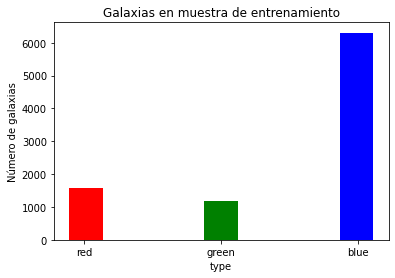

In [66]:
plt.hist([redtrain['type'],greentrain['type'],bluetrain['type']],bins=3, rwidth=1.2, color=['red','green','blue'])
plt.xticks([0.1,1,1.9],['red','green','blue'])
plt.xlabel('type')
plt.ylabel('Número de galaxias')
plt.title('Galaxias en muestra de entrenamiento')
plt.savefig('Figuras para Latex/Supervisados/muestratraining.png');

print(TrainDF.shape[0], ' galaxias totales')
print(redtrain.shape[0], ' rojas que son el ' ,round(redtrain.shape[0]/TrainDF.shape[0]*100,2), '% del total')
print(greentrain.shape[0], ' verdes que son el ' ,round(greentrain.shape[0]/TrainDF.shape[0]*100,2), '% del total')
print(bluetrain.shape[0], ' azules que son el ' , round(bluetrain.shape[0]/TrainDF.shape[0]*100,2), '% del total')
## Mostrar también muestra de test, redshifts
## También test y pred

Las galaxias se encuentran a redshift  0.5769 de media
Las rojas a redshift  0.6091  promedio
Las azules a redshift  0.5815  promedio
Las verdes a redshift  0.5104  promedio
El máximo redshift del catálogo es  2.09  el mínimo  0.00586666673074166


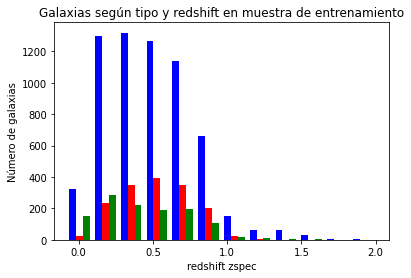

In [67]:
plt.hist([bluetrain['zspec'], redtrain['zspec'],greentrain['zspec']], bins=12,color=['blue','red','green'], align='left') #royal, indian, lime
plt.xlabel('redshift zspec')
plt.ylabel('Número de galaxias')
plt.title('Galaxias según tipo y redshift en muestra de entrenamiento')
plt.savefig('Figuras para Latex/Supervisados/muestratraining2.png');
print('Las galaxias se encuentran a redshift ', round(TrainDF['zspec'].mean(),4), 'de media')
print('Las rojas a redshift ', round(redtrain['zspec'].mean(),4), ' promedio')
print('Las azules a redshift ', round(bluetrain['zspec'].mean(),4), ' promedio')
print('Las verdes a redshift ', round(greentrain['zspec'].mean(),4), ' promedio')
print('El máximo redshift del catálogo es ', round(max(TrainDF['zspec']),4), ' el mínimo ', min(TrainDF['zspec']))

3029  galaxias totales
567  rojas que son el  18.72 % del total
343  verdes que son el  11.32 % del total
2119  azules que son el  69.96 % del total


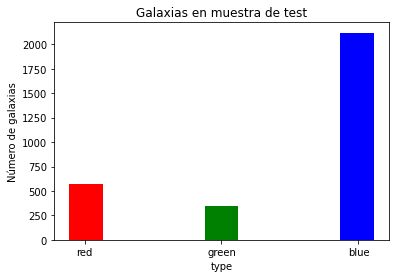

In [68]:
plt.hist([redtest['type'],greentest['type'],bluetest['type']],bins=3, rwidth=1.2, color=['red','green','blue'])
plt.xticks([0.1,1,1.9],['red','green','blue'])
plt.xlabel('type')
plt.ylabel('Número de galaxias')
plt.title('Galaxias en muestra de test')
plt.savefig('Figuras para Latex/Supervisados/muestratest.png');

print(TestDF.shape[0], ' galaxias totales')
print(redtest.shape[0], ' rojas que son el ' ,round(redtest.shape[0]/TestDF.shape[0]*100,2), '% del total')
print(greentest.shape[0], ' verdes que son el ' ,round(greentest.shape[0]/TestDF.shape[0]*100,2), '% del total')
print(bluetest.shape[0], ' azules que son el ' , round(bluetest.shape[0]/TestDF.shape[0]*100,2), '% del total')

Las galaxias se encuentran a redshift  0.5909 de media
Las rojas a redshift  0.6204  promedio
Las azules a redshift  0.5956  promedio
Las verdes a redshift  0.5132  promedio
El máximo redshift del catálogo es  2.7355  el mínimo  0.0


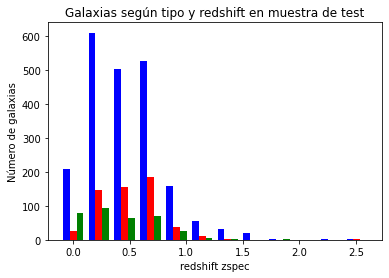

In [69]:
plt.hist([bluetest['zspec'], redtest['zspec'],greentest['zspec']], bins=12,color=['blue','red','green'], align='left') #royal, indian, lime
plt.xlabel('redshift zspec')
plt.ylabel('Número de galaxias')
plt.title('Galaxias según tipo y redshift en muestra de test')
plt.savefig('Figuras para Latex/Supervisados/muestratest2.png');
print('Las galaxias se encuentran a redshift ', round(TestDF['zspec'].mean(),4), 'de media')
print('Las rojas a redshift ', round(redtest['zspec'].mean(),4), ' promedio')
print('Las azules a redshift ', round(bluetest['zspec'].mean(),4), ' promedio')
print('Las verdes a redshift ', round(greentest['zspec'].mean(),4), ' promedio')
print('El máximo redshift del catálogo es ', round(max(TestDF['zspec']),4), ' el mínimo ', min(TestDF['zspec']))

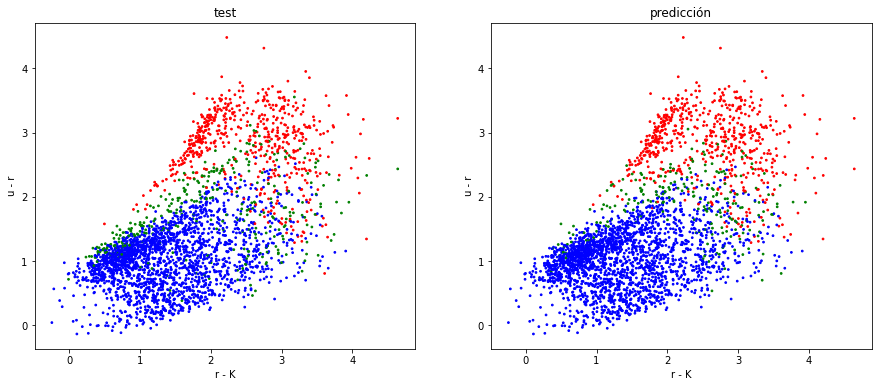

In [70]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
colors = {0:'red', 1:'green', 2:'blue'}
ax[0].scatter(TestDF['m_r_Subaru']-TestDF['m_K_uv'], TestDF['m_u_cfht']-TestDF['m_r_Subaru'],c=TestDF['type'].map(colors),s=3)
ax[0].set_title('test')
ax[0].set_xlabel('r - K')
ax[0].set_ylabel('u - r')

ax[1].scatter(TestDF['m_r_Subaru']-TestDF['m_K_uv'], TestDF['m_u_cfht']-TestDF['m_r_Subaru'],c=TestDF['predtype'].map(colors),s=3)
ax[1].set_title('predicción')
ax[1].set_xlabel('r - K')
ax[1].set_ylabel('u - r')
#fig.suptitle('Diagrama urk resultados kNN')

plt.savefig('Figuras para Latex/Supervisados/kNNtest.png', bbox_inches=mp.transforms.Bbox.from_extents(0,0,7.5,6))
plt.savefig('Figuras para Latex/Supervisados/kNNpred.png', bbox_inches=mp.transforms.Bbox.from_extents(7.5,0,15,6));

In [71]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

TABLATESTKnn = pd.DataFrame([],columns=[#'intervalo redshift',
                                        'num galax' ,'accuracy total','rojas','kNN rojas','pr. rojo', 'recall rojo','f1sc rojo', 'verdes', 'kNN verdes' ,'pr. verde', 'recall verde', 'f1sc verde','azules', 'kNN azules' ,'pr. azul', 'recall azul', 'f1sc azul'])
matrix=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred, output_dict=True, target_names=['rojo', 'verde','azul'], zero_division=0)
fila = [#str(round(min(TestDF['zspec']),1))+'-'+str(round(max(TestDF['zspec']),1)), 
        sum(sum(confusion_matrix(y_test,y_pred))) ,report['accuracy'],
      report['rojo']['support'],matrix[0,0]+matrix[1,0]+matrix[2,0],report['rojo']['precision'], report['rojo']['recall'],report['rojo']['f1-score'],
      report['verde']['support'],matrix[0,1]+matrix[1,1]+matrix[2,1],report['verde']['precision'], report['verde']['recall'],report['verde']['f1-score'],                                   
      report['azul']['support'],matrix[2,2]+matrix[1,2]+matrix[0,2],report['azul']['precision'], report['azul']['recall'],report['azul']['f1-score']]
            #columns=['redshift','num galax' ,'accuracy total','rojas','KM rojas' ,'pr. rojo', 'recall rojo','f1sc rojo','azules', 'KM azules' ,'pr azul', 'recall azul', 'f1sc azul'])
TABLATESTKnn.loc[len(TABLATESTKnn.index)] = fila
TABLATESTKnn.to_csv('Tablas para Latex/Knn.csv');
TABLATESTKnn

,num galax,accuracy total,rojas,kNN rojas,pr. rojo,recall rojo,f1sc rojo,verdes,kNN verdes,pr. verde,recall verde,f1sc verde,azules,kNN azules,pr. azul,recall azul,f1sc azul
0,3029.0,0.88346,567.0,592.0,0.875,0.91358,0.893874,343.0,228.0,0.495614,0.329446,0.395797,2119.0,2209.0,0.925758,0.965078,0.945009


---
***
---

## K Nearest Neighbors
### sin redshift, con componentes principales

In [72]:
from sklearn.neighbors import KNeighborsClassifier
ks=np.linspace(1,40,40).tolist()
TABLATESTkNN = pd.DataFrame([],columns=['k','train accuracy','num galax' ,'accuracy total','rojas','kNN rojas','pr. rojo', 'recall rojo','f1sc rojo', 'verdes', 'kNN verdes' ,'pr. verde', 'recall verde', 'f1sc verde','azules', 'kNN azules' ,'pr. azul', 'recall azul', 'f1sc azul'])
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=int(k))
    knn.fit(X_train[:, -2:], y_train)
    y_pred = knn.predict(X_test[:, -2:])
    matrix=confusion_matrix(y_test,y_pred)
    report=classification_report(y_test,y_pred, output_dict=True, target_names=['rojo', 'verde','azul'], zero_division=0)
    fila = [round(k,0),round(knn.score(X_train[:, -2:], y_train),2),
        sum(sum(confusion_matrix(y_test,y_pred))) ,report['accuracy'],
      report['rojo']['support'],matrix[0,0]+matrix[1,0]+matrix[2,0],report['rojo']['precision'], report['rojo']['recall'],report['rojo']['f1-score'],
      report['verde']['support'],matrix[0,1]+matrix[1,1]+matrix[2,1],report['verde']['precision'], report['verde']['recall'],report['verde']['f1-score'],                                   
      report['azul']['support'],matrix[2,2]+matrix[1,2]+matrix[0,2],report['azul']['precision'], report['azul']['recall'],report['azul']['f1-score']]
        #columns=['k','train accuracy', 'num galax' ,'accuracy total','rojas','tree rojas' ,'pr. rojo', 'recall rojo','f1sc rojo','azules', 'tree azules' ,'pr azul', 'recall azul', 'f1sc azul'])
    TABLATESTkNN.loc[len(TABLATESTkNN.index)] = fila

In [73]:
TABLATESTkNN.sort_values(by=['f1sc verde', 'f1sc rojo', 'f1sc azul'], ascending=False).head()

,k,train accuracy,num galax,accuracy total,rojas,kNN rojas,pr. rojo,recall rojo,f1sc rojo,verdes,kNN verdes,pr. verde,recall verde,f1sc verde,azules,kNN azules,pr. azul,recall azul,f1sc azul
0,1.0,1.00,3029.0,0.791680,567.0,546.0,0.827839,0.797178,0.812219,343.0,425.0,0.237647,0.294461,0.263021,2119.0,2058.0,0.896501,0.870694,0.883409
11,12.0,0.86,3029.0,0.855398,567.0,573.0,0.853403,0.862434,0.857895,343.0,179.0,0.379888,0.198251,0.260536,2119.0,2277.0,0.893281,0.959887,0.925387
10,11.0,0.86,3029.0,0.856058,567.0,576.0,0.847222,0.860670,0.853893,343.0,170.0,0.388235,0.192420,0.257310,2119.0,2283.0,0.893123,0.962246,0.926397
9,10.0,0.87,3029.0,0.853087,567.0,565.0,0.861947,0.858907,0.860424,343.0,189.0,0.354497,0.195335,0.251880,2119.0,2275.0,0.892308,0.957999,0.923987
7,8.0,0.87,3029.0,0.846154,567.0,575.0,0.846957,0.858907,0.852890,343.0,213.0,0.323944,0.201166,0.248201,2119.0,2241.0,0.895582,0.947145,0.920642


In [74]:
TABLATESTkNN

,k,train accuracy,num galax,accuracy total,rojas,kNN rojas,pr. rojo,recall rojo,f1sc rojo,verdes,kNN verdes,pr. verde,recall verde,f1sc verde,azules,kNN azules,pr. azul,recall azul,f1sc azul
0,1.0,1.00,3029.0,0.791680,567.0,546.0,0.827839,0.797178,0.812219,343.0,425.0,0.237647,0.294461,0.263021,2119.0,2058.0,0.896501,0.870694,0.883409
1,2.0,0.90,3029.0,0.757016,567.0,658.0,0.761398,0.883598,0.817959,343.0,537.0,0.202980,0.317784,0.247727,2119.0,1834.0,0.917666,0.794243,0.851505
2,3.0,0.89,3029.0,0.823044,567.0,605.0,0.803306,0.857143,0.829352,343.0,245.0,0.232653,0.166181,0.193878,2119.0,2179.0,0.894906,0.920245,0.907399
3,4.0,0.88,3029.0,0.816771,567.0,590.0,0.835593,0.869489,0.852204,343.0,322.0,0.245342,0.230321,0.237594,2119.0,2117.0,0.898441,0.897593,0.898017
4,5.0,0.88,3029.0,0.837900,567.0,582.0,0.829897,0.851852,0.840731,343.0,230.0,0.282609,0.189504,0.226876,2119.0,2217.0,0.897609,0.939122,0.917897
5,6.0,0.88,3029.0,0.836250,567.0,591.0,0.825719,0.860670,0.842832,343.0,227.0,0.277533,0.183673,0.221053,2119.0,2211.0,0.896427,0.935347,0.915473
6,7.0,0.87,3029.0,0.843183,567.0,567.0,0.844797,0.844797,0.844797,343.0,208.0,0.298077,0.180758,0.225045,2119.0,2254.0,0.893079,0.949976,0.920649
7,8.0,0.87,3029.0,0.846154,567.0,575.0,0.846957,0.858907,0.852890,343.0,213.0,0.323944,0.201166,0.248201,2119.0,2241.0,0.895582,0.947145,0.920642
8,9.0,0.87,3029.0,0.851436,567.0,577.0,0.844021,0.858907,0.851399,343.0,180.0,0.350000,0.183673,0.240918,2119.0,2272.0,0.893046,0.957527,0.924163
9,10.0,0.87,3029.0,0.853087,567.0,565.0,0.861947,0.858907,0.860424,343.0,189.0,0.354497,0.195335,0.251880,2119.0,2275.0,0.892308,0.957999,0.923987


In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train[:, -2:], y_train) #Pero el ajuste no tiene en cuenta la columna de redshift ni las magnitudes

#Creo dataframes con los datos uno para train y otro para test
TrainDF=pd.DataFrame(X_train, columns=mag_z)
TrainDF['type']=y_train
TestDF=pd.DataFrame(X_test, columns=mag_z)
TestDF['type']=y_test
y_pred = knn.predict(X_test[:, -2:]) #La predicción tampoco toma el redhshift ni las magnitudes
TestDF['predtype']=y_pred

Text(0, 0.5, 'ppacl comp2')

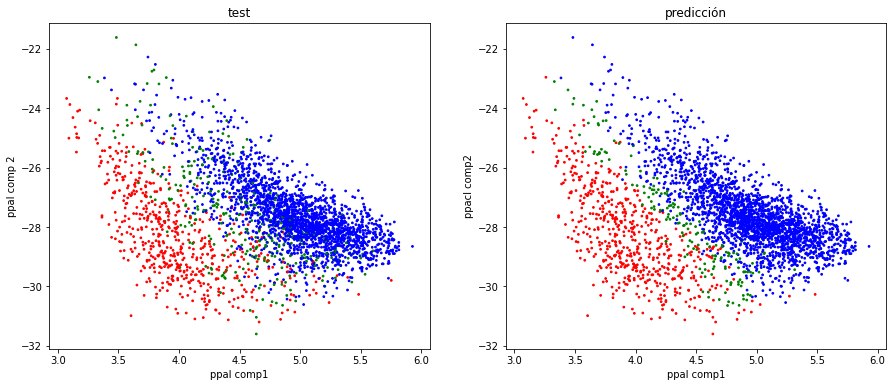

In [76]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
colors = {0:'red', 1:'green', 2:'blue'}
ax[0].scatter(TestDF[0], TestDF[1],c=TestDF['type'].map(colors),s=3)
ax[0].set_title('test')
ax[0].set_xlabel('ppal comp1')
ax[0].set_ylabel('ppal comp 2')

ax[1].scatter(TestDF[0], TestDF[1],c=TestDF['predtype'].map(colors),s=3)
ax[1].set_title('predicción')
ax[1].set_xlabel('ppal comp1')
ax[1].set_ylabel('ppacl comp2')
#fig.suptitle('Diagrama urk resultados kNN')

# plt.savefig('Figuras para Latex/Supervisados/kNNtestppalcomps.png', bbox_inches=mp.transforms.Bbox.from_extents(0,0,7.5,6))
# plt.savefig('Figuras para Latex/Supervisados/kNNpredppalcomps.png', bbox_inches=mp.transforms.Bbox.from_extents(7.5,0,15,6));

In [77]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

TABLATESTKnn = pd.DataFrame([],columns=[#'intervalo redshift',
                                        'num galax' ,'accuracy total','rojas','kNN rojas','pr. rojo', 'recall rojo','f1sc rojo', 'verdes', 'kNN verdes' ,'pr. verde', 'recall verde', 'f1sc verde','azules', 'kNN azules' ,'pr. azul', 'recall azul', 'f1sc azul'])
matrix=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred, output_dict=True, target_names=['rojo', 'verde','azul'], zero_division=0)
fila = [#str(round(min(TestDF['zspec']),1))+'-'+str(round(max(TestDF['zspec']),1)), 
        sum(sum(confusion_matrix(y_test,y_pred))) ,report['accuracy'],
      report['rojo']['support'],matrix[0,0]+matrix[1,0]+matrix[2,0],report['rojo']['precision'], report['rojo']['recall'],report['rojo']['f1-score'],
      report['verde']['support'],matrix[0,1]+matrix[1,1]+matrix[2,1],report['verde']['precision'], report['verde']['recall'],report['verde']['f1-score'],                                   
      report['azul']['support'],matrix[2,2]+matrix[1,2]+matrix[0,2],report['azul']['precision'], report['azul']['recall'],report['azul']['f1-score']]
            #columns=['redshift','num galax' ,'accuracy total','rojas','KM rojas' ,'pr. rojo', 'recall rojo','f1sc rojo','azules', 'KM azules' ,'pr azul', 'recall azul', 'f1sc azul'])
TABLATESTKnn.loc[len(TABLATESTKnn.index)] = fila
TABLATESTKnn.to_csv('Tablas para Latex/Knnppalcomps.csv');
TABLATESTKnn

,num galax,accuracy total,rojas,kNN rojas,pr. rojo,recall rojo,f1sc rojo,verdes,kNN verdes,pr. verde,recall verde,f1sc verde,azules,kNN azules,pr. azul,recall azul,f1sc azul
0,3029.0,0.856058,567.0,576.0,0.847222,0.86067,0.853893,343.0,170.0,0.388235,0.19242,0.25731,2119.0,2283.0,0.893123,0.962246,0.926397


---
***
---

# Linear models

Ahora probaré haciendo un ajuste lineal para clasificación. Tenemos una predicción y con y= **w** * **f** + b siendo w vector de parámteros que el algortimo encuentra con la muestra de entrenamiento, f vector de features(magnitudes, ppal comps), y b una constante. Si la predicción es mayor que 0 el algoritmo asignará una clase y si es menor que 0 la otra. Para clasificación en más de dos tipos el algoritmo encuentra una ecuación de ese tipo para cada clase. Separa el tipo 0 del 1y2, el 1 del 0y2, y el 2 del 0y1.

El modelo lineal no converge usando las magnitudes, voy a probar con componentes ppales.

In [78]:
#No hace falta hacer el split otra vez creo, aunque no pasaría nada porque la semilla de datos es aleatoria

#from sklearn.model_selection import train_test_split
#magnitudes = ['m_u_cfht', 'm_B_Subaru', 'm_V_Subaru', 'm_r_Subaru', 'm_i_Subaru', 'm_suprime_FDCCD_z', 'm_Y_uv', 'm_J_uv','m_H_uv','m_K_uv']
#mag_z=magnitudes  #lista con los nombres de las columnas con magnitudes
#X_train, X_test, y_train, y_test = train_test_split(Tab[ppalcomps].to_numpy(), Tab['type'].to_numpy(), random_state=0)
#X_train, X_test, y.. son numpy arrays. Están las magniutdes solo.

In [79]:
# from sklearn.svm import LinearSVC
# linear_svm = LinearSVC(C=0.001, max_iter=100000).fit(X_train[:, -2:], y_train) #he tenido que aumentar el número de iteraciones por defecto

In [80]:
# TrainDF=pd.DataFrame(X_train, columns=mag_z)
# TrainDF['type']=y_train
# TestDF=pd.DataFrame(X_test, columns=mag_z)
# TestDF['type']=y_test
# y_pred = linear_svm.predict(X_test[:, -2:])
# TestDF['predtype']=y_pred

In [81]:
# colors = {0:'red', 1:'green', 2:'blue'}
# fig, ax=plt.subplots(1,2, figsize=(15,8))
# ax[0].scatter(TrainDF[0], TrainDF[1], c=TrainDF['type'].map(colors), s=2)
# line = np.linspace(3, 6)
# for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['r', 'g', 'b']):
#     ax[0].plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
# ax[0].set_title('Clasificación catálogo, training')
# ax[0].set_ylim(-33, -20)
# ax[0].set_xlabel('feature 1')
# ax[0].set_ylabel('feature 2')

# ax[1].scatter(TestDF[0], TestDF[1], c=TestDF['predtype'].map(colors), s=2)
# line = np.linspace(3, 6)
# for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['r', 'g', 'b']):
#     ax[1].plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
# ax[1].set_title('Linear model, test')
# ax[1].set_ylim(-33, -20)
# ax[1].set_xlabel('feature 1')
# ax[1].set_ylabel('feature 2')
# #ax[0].legend(['Line class 0', 'Line class 1','Line class 2','1','2','3'], loc=(0.7,0.6))

In [82]:
# C=[0.01]
# C.extend(np.linspace(0.1,0.9,9).tolist())
# C.extend(np.linspace(1,10,10).tolist())
# C.extend(np.linspace(20,100,9).tolist())

# for c in C:
#     print(c)

In [83]:
from sklearn.svm import LinearSVC
C=[0.01]
C.extend(np.linspace(0.1,0.9,9).tolist())
C.extend(np.linspace(1,10,10).tolist())
#C.extend(np.linspace(20,100,9).tolist())
TABLATESTLinear = pd.DataFrame([],columns=['C param','num galax' ,'accuracy total','rojas','Linear rojas','pr. rojo', 'recall rojo','f1sc rojo', 'verdes', 'Linear verdes' ,'pr. verde', 'recall verde', 'f1sc verde','azules', 'Linear azules' ,'pr. azul', 'recall azul', 'f1sc azul'])
for c in C:
    linear_svm = LinearSVC(C=c, max_iter=100000).fit(X_train[:, -2:], y_train) #he tenido que aumentar el número de iteraciones por defecto
    y_pred = linear_svm.predict(X_test[:, -2:])
    matrix=confusion_matrix(y_test,y_pred)
    report=classification_report(y_test,y_pred, output_dict=True, target_names=['rojo', 'verde','azul'], zero_division=0)
    fila = [str(round(c,1)), sum(sum(confusion_matrix(y_test,y_pred))) ,report['accuracy'],
      report['rojo']['support'],matrix[0,0]+matrix[1,0]+matrix[2,0],report['rojo']['precision'], report['rojo']['recall'],report['rojo']['f1-score'],
      report['verde']['support'],matrix[0,1]+matrix[1,1]+matrix[2,1],report['verde']['precision'], report['verde']['recall'],report['verde']['f1-score'],                                   
      report['azul']['support'],matrix[2,2]+matrix[1,2]+matrix[0,2],report['azul']['precision'], report['azul']['recall'],report['azul']['f1-score']]
            #columns=['C param','num galax' ,'accuracy total','rojas','linear rojas' ,'pr. rojo', 'recall rojo','f1sc rojo','azules', 'linear azules' ,'pr azul', 'recall azul', 'f1sc azul'])
    TABLATESTLinear.loc[len(TABLATESTLinear.index)] = fila

C:\Users\Daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Daniel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  

In [84]:
TABLATESTLinear

,C param,num galax,accuracy total,rojas,Linear rojas,pr. rojo,recall rojo,f1sc rojo,verdes,Linear verdes,pr. verde,recall verde,f1sc verde,azules,Linear azules,pr. azul,recall azul,f1sc azul
0,0.0,3029,0.856388,567,607,0.822076,0.880071,0.850085,343,0,0.0,0.0,0.0,2119,2422,0.864988,0.988674,0.922704
1,0.1,3029,0.859029,567,617,0.821718,0.894180,0.856419,343,0,0.0,0.0,0.0,2119,2412,0.868574,0.988674,0.924741
2,0.2,3029,0.858039,567,621,0.816425,0.894180,0.853535,343,0,0.0,0.0,0.0,2119,2408,0.868771,0.987258,0.924232
3,0.3,3029,0.857379,567,621,0.814815,0.892416,0.851852,343,0,0.0,0.0,0.0,2119,2408,0.868355,0.986786,0.923791
4,0.4,3029,0.857379,567,620,0.816129,0.892416,0.852570,343,0,0.0,0.0,0.0,2119,2409,0.867995,0.986786,0.923587
5,0.5,3029,0.857709,567,621,0.816425,0.894180,0.853535,343,0,0.0,0.0,0.0,2119,2408,0.868355,0.986786,0.923791
6,0.6,3029,0.857709,567,621,0.816425,0.894180,0.853535,343,0,0.0,0.0,0.0,2119,2408,0.868355,0.986786,0.923791
7,0.7,3029,0.857709,567,623,0.815409,0.895944,0.853782,343,0,0.0,0.0,0.0,2119,2406,0.868662,0.986314,0.923757
8,0.8,3029,0.858369,567,623,0.817014,0.897707,0.855462,343,0,0.0,0.0,0.0,2119,2406,0.869077,0.986786,0.924199
9,0.9,3029,0.858369,567,623,0.817014,0.897707,0.855462,343,0,0.0,0.0,0.0,2119,2406,0.869077,0.986786,0.924199


In [85]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC(C=0.1, max_iter=100000).fit(X_train[:, -2:], y_train) #he tenido que aumentar el número de iteraciones por defecto

TrainDF=pd.DataFrame(X_train, columns=mag_z)
TrainDF['type']=y_train
TestDF=pd.DataFrame(X_test, columns=mag_z)
TestDF['type']=y_test
y_pred = linear_svm.predict(X_test[:, -2:])
TestDF['predtype']=y_pred

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

TABLATESTLinear = pd.DataFrame([],columns=[#'intervalo redshift',
                                        'num galax' ,'accuracy total','rojas','Linear rojas','pr. rojo', 'recall rojo','f1sc rojo', 'verdes', 'Linear verdes' ,'pr. verde', 'recall verde', 'f1sc verde','azules', 'Linear azules' ,'pr. azul', 'recall azul', 'f1sc azul'])
matrix=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred, output_dict=True, target_names=['rojo', 'verde','azul'], zero_division=0)
fila = [#str(round(min(TestDF['zspec']),1))+'-'+str(round(max(TestDF['zspec']),1)), 
        sum(sum(confusion_matrix(y_test,y_pred))) ,report['accuracy'],
      report['rojo']['support'],matrix[0,0]+matrix[1,0]+matrix[2,0],report['rojo']['precision'], report['rojo']['recall'],report['rojo']['f1-score'],
      report['verde']['support'],matrix[0,1]+matrix[1,1]+matrix[2,1],report['verde']['precision'], report['verde']['recall'],report['verde']['f1-score'],                                   
      report['azul']['support'],matrix[2,2]+matrix[1,2]+matrix[0,2],report['azul']['precision'], report['azul']['recall'],report['azul']['f1-score']]
            #columns=['redshift','num galax' ,'accuracy total','rojas','KM rojas' ,'pr. rojo', 'recall rojo','f1sc rojo','azules', 'KM azules' ,'pr azul', 'recall azul', 'f1sc azul'])
TABLATESTLinear.loc[len(TABLATESTLinear.index)] = fila
TABLATESTLinear.to_csv('Tablas para Latex/linear.csv');
TABLATESTLinear

,num galax,accuracy total,rojas,Linear rojas,pr. rojo,recall rojo,f1sc rojo,verdes,Linear verdes,pr. verde,recall verde,f1sc verde,azules,Linear azules,pr. azul,recall azul,f1sc azul
0,3029.0,0.859029,567.0,617.0,0.821718,0.89418,0.856419,343.0,0.0,0.0,0.0,0.0,2119.0,2412.0,0.868574,0.988674,0.924741


In [86]:
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report

# TABLATESTLinear = pd.DataFrame([],columns=[#'intervalo redshift',
#                                         'num galax' ,'accuracy total','rojas','Linear rojas','pr. rojo', 'recall rojo','f1sc rojo', 'verdes', 'Linear verdes' ,'pr. verde', 'recall verde', 'f1sc verde','azules', 'Linear azules' ,'pr. azul', 'recall azul', 'f1sc azul'])
# matrix=confusion_matrix(y_test,y_pred)
# report=classification_report(y_test,y_pred, output_dict=True, target_names=['rojo', 'verde','azul'], zero_division=0)
# fila = [#str(round(min(TestDF['zspec']),1))+'-'+str(round(max(TestDF['zspec']),1)), 
#         sum(sum(confusion_matrix(y_test,y_pred))) ,report['accuracy'],
#       report['rojo']['support'],matrix[0,0]+matrix[1,0]+matrix[2,0],report['rojo']['precision'], report['rojo']['recall'],report['rojo']['f1-score'],
#       report['verde']['support'],matrix[0,1]+matrix[1,1]+matrix[2,1],report['verde']['precision'], report['verde']['recall'],report['verde']['f1-score'],                                   
#       report['azul']['support'],matrix[2,2]+matrix[1,2]+matrix[0,2],report['azul']['precision'], report['azul']['recall'],report['azul']['f1-score']]
#             #columns=['redshift','num galax' ,'accuracy total','rojas','KM rojas' ,'pr. rojo', 'recall rojo','f1sc rojo','azules', 'KM azules' ,'pr azul', 'recall azul', 'f1sc azul'])
# TABLATESTLinear.loc[len(TABLATESTLinear.index)] = fila
# TABLATESTLinear

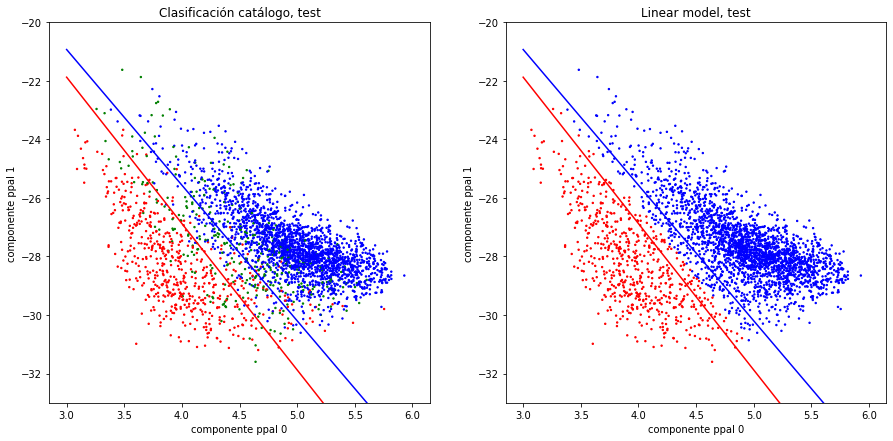

In [87]:
colors = {0:'red', 1:'green', 2:'blue'}
fig, ax=plt.subplots(1,2, figsize=(15,7))

ax[0].scatter(TestDF[0], TestDF[1], c=TestDF['type'].map(colors), s=2)
line = np.linspace(3, 6)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['r', 'g', 'b']):
    ax[0].plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
ax[0].set_title('Clasificación catálogo, test')
ax[0].set_ylim(-33, -20)
ax[0].set_xlabel('componente ppal 0')
ax[0].set_ylabel('componente ppal 1')

ax[1].scatter(TestDF[0], TestDF[1], c=TestDF['predtype'].map(colors), s=2)
line = np.linspace(3, 6)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['r', 'g', 'b']):
    ax[1].plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
ax[1].set_title('Linear model, test')
ax[1].set_ylim(-33, -20)
ax[1].set_xlabel('componente ppal 0')
ax[1].set_ylabel('componente ppal 1')

plt.savefig('Figuras para Latex/Supervisados/lineartest.png', bbox_inches=mp.transforms.Bbox.from_extents(0,0,7.5,7))
plt.savefig('Figuras para Latex/Supervisados/linearpred.png', bbox_inches=mp.transforms.Bbox.from_extents(7.5,0,15,7));

# Decision trees
## con magnitudes
En lugar de hacer preguntas de sí o no. El algoritmo hará preguntas tipo ¿es esta feature mayor que esta cantidad? e irá agrupando las diferentes categorías. Hay que vigilar la profundidad del árbol (el número de preguntas que puede hacer) para evitar que sufra overfitting y no tenga una buena generalización.

In [88]:
from sklearn.tree import DecisionTreeClassifier 

In [89]:
#from sklearn.model_selection import train_test_split
#magnitudes = ['m_u_cfht', 'm_B_Subaru', 'm_V_Subaru', 'm_r_Subaru', 'm_i_Subaru', 'm_suprime_FDCCD_z', 'm_Y_uv', 'm_J_uv','m_H_uv','m_K_uv']
#X_train, X_test, y_train, y_test = train_test_split(Tab[magnitudes].to_numpy(), Tab['type'].to_numpy(), random_state=0)
#X_train, X_test, y.. son numpy arrays. Están las magniutdes solo.

#Ajustamos el modelo a los datos train.
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(X_train[:, :-3], y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

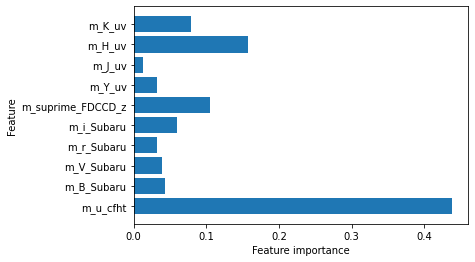

In [90]:
def plot_feature_importances(model):
 n_features = X_train[:, :-3].shape[1]
 plt.barh(range(n_features), model.feature_importances_, align='center')
 plt.yticks(np.arange(n_features), magnitudes)
 plt.xlabel("Feature importance")
 plt.ylabel("Feature")
plot_feature_importances(tree)

El gráfico anterior es: el algoritmo puntua de 0 a 1 cada feature en función de la importancia que tiene a la hora de tomar las decisiones en cada rama del árbol. Todas las puntuaciones suman 1. Pero no tiene por qué haber una correspondencia directa entre las 'mejores' features y la clase o tipo a que pertenece la galaxia. Puede que la información que contiene las mejores features también la tengan combinaciones de las otras. . . . . .

In [91]:
TrainDF=pd.DataFrame(X_train, columns=mag_z)
TrainDF['type']=y_train
TestDF=pd.DataFrame(X_test, columns=mag_z)
TestDF['type']=y_test
y_pred = tree.predict(X_test[:, :-3])
TestDF['predtype']=y_pred

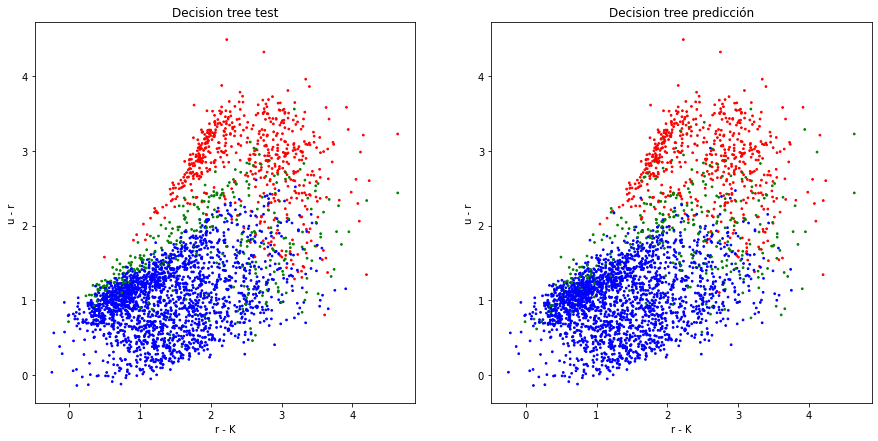

In [92]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
colors = {0:'red', 1:'green', 2:'blue'}
ax[0].scatter(TestDF['m_r_Subaru']-TestDF['m_K_uv'], TestDF['m_u_cfht']-TestDF['m_r_Subaru'],c=TestDF['type'].map(colors),s=3)
ax[0].set_title('Decision tree test')
ax[0].set_xlabel('r - K')
ax[0].set_ylabel('u - r')

ax[1].scatter(TestDF['m_r_Subaru']-TestDF['m_K_uv'], TestDF['m_u_cfht']-TestDF['m_r_Subaru'],c=TestDF['predtype'].map(colors),s=3)
ax[1].set_title('Decision tree predicción')
ax[1].set_xlabel('r - K')
ax[1].set_ylabel('u - r')

plt.savefig('Figuras para Latex/Supervisados/treetest.png', bbox_inches=mp.transforms.Bbox.from_extents(0,0,7.5,7))
plt.savefig('Figuras para Latex/Supervisados/treepred.png', bbox_inches=mp.transforms.Bbox.from_extents(7.5,0,15,7));

In [93]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

TABLATESTtree = pd.DataFrame([],columns=['depth',
                                        'num galax' ,'accuracy total','rojas','tree rojas','pr. rojo', 'recall rojo','f1sc rojo', 'verdes', 'tree verdes' ,'pr. verde', 'recall verde', 'f1sc verde','azules', 'tree azules' ,'pr. azul', 'recall azul', 'f1sc azul'])
matrix=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred, output_dict=True, target_names=['rojo', 'verde','azul'], zero_division=0)
fila = [10, 
        sum(sum(confusion_matrix(y_test,y_pred))) ,report['accuracy'],
      report['rojo']['support'],matrix[0,0]+matrix[1,0]+matrix[2,0],report['rojo']['precision'], report['rojo']['recall'],report['rojo']['f1-score'],
      report['verde']['support'],matrix[0,1]+matrix[1,1]+matrix[2,1],report['verde']['precision'], report['verde']['recall'],report['verde']['f1-score'],                                   
      report['azul']['support'],matrix[2,2]+matrix[1,2]+matrix[0,2],report['azul']['precision'], report['azul']['recall'],report['azul']['f1-score']]
            #columns=['redshift','num galax' ,'accuracy total','rojas','KM rojas' ,'pr. rojo', 'recall rojo','f1sc rojo','azules', 'KM azules' ,'pr azul', 'recall azul', 'f1sc azul'])
TABLATESTtree.loc[len(TABLATESTtree.index)] = fila
TABLATESTtree.to_csv('Tablas para Latex/tree.csv');
TABLATESTtree

,depth,num galax,accuracy total,rojas,tree rojas,pr. rojo,recall rojo,f1sc rojo,verdes,tree verdes,pr. verde,recall verde,f1sc verde,azules,tree azules,pr. azul,recall azul,f1sc azul
0,10.0,3029.0,0.856058,567.0,557.0,0.883303,0.867725,0.875445,343.0,324.0,0.395062,0.373178,0.383808,2119.0,2148.0,0.918529,0.9311,0.924772


In [94]:
# depths=np.linspace(3,100,98).tolist()
# depths

In [95]:
from sklearn.tree import DecisionTreeClassifier 
depths=np.linspace(3,20,18).tolist()
TABLATESTtree = pd.DataFrame([],columns=['depth','train accuracy','num galax' ,'accuracy total','rojas','tree rojas','pr. rojo', 'recall rojo','f1sc rojo', 'verdes', 'tree verdes' ,'pr. verde', 'recall verde', 'f1sc verde','azules', 'tree azules' ,'pr. azul', 'recall azul', 'f1sc azul'])
for d in depths:
    tree = DecisionTreeClassifier(random_state=0, max_depth=d)
    tree.fit(X_train[:, :-3], y_train)
    y_pred = tree.predict(X_test[:, :-3])
    matrix=confusion_matrix(y_test,y_pred)
    report=classification_report(y_test,y_pred, output_dict=True, target_names=['rojo', 'verde','azul'], zero_division=0)
    fila = [round(d,0),round(tree.score(X_train[:, :-3], y_train),2),
        sum(sum(confusion_matrix(y_test,y_pred))) ,report['accuracy'],
      report['rojo']['support'],matrix[0,0]+matrix[1,0]+matrix[2,0],report['rojo']['precision'], report['rojo']['recall'],report['rojo']['f1-score'],
      report['verde']['support'],matrix[0,1]+matrix[1,1]+matrix[2,1],report['verde']['precision'], report['verde']['recall'],report['verde']['f1-score'],                                   
      report['azul']['support'],matrix[2,2]+matrix[1,2]+matrix[0,2],report['azul']['precision'], report['azul']['recall'],report['azul']['f1-score']]
        #columns=['depth','train accuracy', 'num galax' ,'accuracy total','rojas','tree rojas' ,'pr. rojo', 'recall rojo','f1sc rojo','azules', 'tree azules' ,'pr azul', 'recall azul', 'f1sc azul'])
    TABLATESTtree.loc[len(TABLATESTtree.index)] = fila

In [96]:
TABLATESTtree

,depth,train accuracy,num galax,accuracy total,rojas,tree rojas,pr. rojo,recall rojo,f1sc rojo,verdes,tree verdes,pr. verde,recall verde,f1sc verde,azules,tree azules,pr. azul,recall azul,f1sc azul
0,3.0,0.82,3029.0,0.831958,567.0,620.0,0.750000,0.820106,0.783488,343.0,0.0,0.000000,0.000000,0.000000,2119.0,2409.0,0.853051,0.969797,0.907686
1,4.0,0.83,3029.0,0.831628,567.0,590.0,0.767797,0.798942,0.783060,343.0,57.0,0.298246,0.049563,0.085000,2119.0,2382.0,0.860202,0.966966,0.910464
2,5.0,0.85,3029.0,0.846814,567.0,605.0,0.809917,0.864198,0.836177,343.0,142.0,0.323944,0.134111,0.189691,2119.0,2282.0,0.889132,0.957527,0.922063
3,6.0,0.86,3029.0,0.849455,567.0,556.0,0.852518,0.835979,0.844167,343.0,162.0,0.333333,0.157434,0.213861,2119.0,2311.0,0.884898,0.965078,0.923251
4,7.0,0.88,3029.0,0.858369,567.0,599.0,0.841402,0.888889,0.864494,343.0,161.0,0.391304,0.183673,0.250000,2119.0,2269.0,0.895989,0.959415,0.926618
5,8.0,0.90,3029.0,0.854407,567.0,538.0,0.882900,0.837743,0.859729,343.0,251.0,0.366534,0.268222,0.309764,2119.0,2240.0,0.902232,0.953752,0.927277
6,9.0,0.92,3029.0,0.855728,567.0,537.0,0.890130,0.843034,0.865942,343.0,323.0,0.386997,0.364431,0.375375,2119.0,2169.0,0.917012,0.938650,0.927705
7,10.0,0.94,3029.0,0.856058,567.0,557.0,0.883303,0.867725,0.875445,343.0,324.0,0.395062,0.373178,0.383808,2119.0,2148.0,0.918529,0.931100,0.924772
8,11.0,0.96,3029.0,0.852096,567.0,576.0,0.859375,0.873016,0.866142,343.0,311.0,0.369775,0.335277,0.351682,2119.0,2142.0,0.920168,0.930156,0.925135
9,12.0,0.97,3029.0,0.854077,567.0,565.0,0.876106,0.873016,0.874558,343.0,319.0,0.376176,0.349854,0.362538,2119.0,2145.0,0.919347,0.930628,0.924953


In [97]:
TABLATESTtree.loc[TABLATESTtree['accuracy total']==max(TABLATESTtree['accuracy total'])]

,depth,train accuracy,num galax,accuracy total,rojas,tree rojas,pr. rojo,recall rojo,f1sc rojo,verdes,tree verdes,pr. verde,recall verde,f1sc verde,azules,tree azules,pr. azul,recall azul,f1sc azul
4,7.0,0.88,3029.0,0.858369,567.0,599.0,0.841402,0.888889,0.864494,343.0,161.0,0.391304,0.183673,0.25,2119.0,2269.0,0.895989,0.959415,0.926618


In [98]:
TABLATESTtree.sort_values(by=['f1sc verde', 'f1sc rojo', 'f1sc azul'], ascending=False)

,depth,train accuracy,num galax,accuracy total,rojas,tree rojas,pr. rojo,recall rojo,f1sc rojo,verdes,tree verdes,pr. verde,recall verde,f1sc verde,azules,tree azules,pr. azul,recall azul,f1sc azul
14,17.0,0.99,3029.0,0.846484,567.0,554.0,0.886282,0.865961,0.876004,343.0,379.0,0.369393,0.408163,0.387812,2119.0,2096.0,0.922233,0.912223,0.917200
12,15.0,0.99,3029.0,0.847144,567.0,554.0,0.880866,0.860670,0.870651,343.0,374.0,0.368984,0.402332,0.384937,2119.0,2101.0,0.923370,0.915526,0.919431
7,10.0,0.94,3029.0,0.856058,567.0,557.0,0.883303,0.867725,0.875445,343.0,324.0,0.395062,0.373178,0.383808,2119.0,2148.0,0.918529,0.931100,0.924772
16,19.0,1.00,3029.0,0.847144,567.0,565.0,0.881416,0.878307,0.879859,343.0,369.0,0.368564,0.396501,0.382022,2119.0,2095.0,0.922196,0.911751,0.916944
17,20.0,1.00,3029.0,0.843843,567.0,557.0,0.888689,0.873016,0.880783,343.0,387.0,0.359173,0.405248,0.380822,2119.0,2085.0,0.921823,0.907032,0.914367
13,16.0,0.99,3029.0,0.846484,567.0,557.0,0.883303,0.867725,0.875445,343.0,368.0,0.366848,0.393586,0.379747,2119.0,2104.0,0.920627,0.914110,0.917357
10,13.0,0.98,3029.0,0.850116,567.0,563.0,0.879218,0.873016,0.876106,343.0,348.0,0.373563,0.379009,0.376266,2119.0,2118.0,0.920680,0.920245,0.920463
6,9.0,0.92,3029.0,0.855728,567.0,537.0,0.890130,0.843034,0.865942,343.0,323.0,0.386997,0.364431,0.375375,2119.0,2169.0,0.917012,0.938650,0.927705
15,18.0,1.00,3029.0,0.845163,567.0,560.0,0.883929,0.873016,0.878438,343.0,371.0,0.361186,0.390671,0.375350,2119.0,2098.0,0.920400,0.911279,0.915817
11,14.0,0.99,3029.0,0.847474,567.0,561.0,0.887701,0.878307,0.882979,343.0,368.0,0.361413,0.387755,0.374121,2119.0,2100.0,0.921905,0.913639,0.917753


***
---
***

# Decision trees
## con ppal comps
En lugar de hacer preguntas de sí o no. El algoritmo hará preguntas tipo ¿es esta feature mayor que esta cantidad? e irá agrupando las diferentes categorías. Hay que vigilar la profundidad del árbol (el número de preguntas que puede hacer) para evitar que sufra overfitting y no tenga una buena generalización.

In [102]:
from sklearn.tree import DecisionTreeClassifier 

In [103]:
#from sklearn.model_selection import train_test_split
#magnitudes = ['m_u_cfht', 'm_B_Subaru', 'm_V_Subaru', 'm_r_Subaru', 'm_i_Subaru', 'm_suprime_FDCCD_z', 'm_Y_uv', 'm_J_uv','m_H_uv','m_K_uv']
#X_train, X_test, y_train, y_test = train_test_split(Tab[magnitudes].to_numpy(), Tab['type'].to_numpy(), random_state=0)
#X_train, X_test, y.. son numpy arrays. Están las magniutdes solo.

#Ajustamos el modelo a los datos train.
tree = DecisionTreeClassifier(max_depth=9, random_state=0)
tree.fit(X_train[:, -2:], y_train)

DecisionTreeClassifier(max_depth=9, random_state=0)

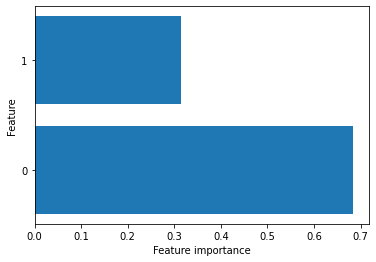

In [104]:
def plot_feature_importances(model):
 n_features = X_train[:, -2:].shape[1]
 plt.barh(range(n_features), model.feature_importances_, align='center')
 plt.yticks(np.arange(n_features), ppalcomps)
 plt.xlabel("Feature importance")
 plt.ylabel("Feature")
plot_feature_importances(tree)

El gráfico anterior es: el algoritmo puntua de 0 a 1 cada feature en función de la importancia que tiene a la hora de tomar las decisiones en cada rama del árbol. Todas las puntuaciones suman 1. Pero no tiene por qué haber una correspondencia directa entre las 'mejores' features y la clase o tipo a que pertenece la galaxia. Puede que la información que contiene las mejores features también la tengan combinaciones de las otras. . . . . .

In [105]:
TrainDF=pd.DataFrame(X_train, columns=mag_z)
TrainDF['type']=y_train
TestDF=pd.DataFrame(X_test, columns=mag_z)
TestDF['type']=y_test
y_pred = tree.predict(X_test[:, -2:])
TestDF['predtype']=y_pred

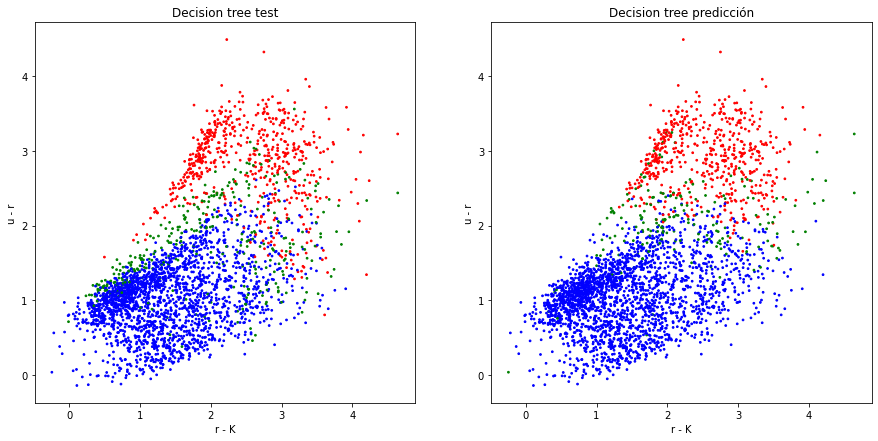

In [106]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
colors = {0:'red', 1:'green', 2:'blue'}
ax[0].scatter(TestDF['m_r_Subaru']-TestDF['m_K_uv'], TestDF['m_u_cfht']-TestDF['m_r_Subaru'],c=TestDF['type'].map(colors),s=3)
ax[0].set_title('Decision tree test')
ax[0].set_xlabel('r - K')
ax[0].set_ylabel('u - r')

ax[1].scatter(TestDF['m_r_Subaru']-TestDF['m_K_uv'], TestDF['m_u_cfht']-TestDF['m_r_Subaru'],c=TestDF['predtype'].map(colors),s=3)
ax[1].set_title('Decision tree predicción')
ax[1].set_xlabel('r - K')
ax[1].set_ylabel('u - r')

plt.savefig('Figuras para Latex/Supervisados/treetestppalcomps.png', bbox_inches=mp.transforms.Bbox.from_extents(0,0,7.5,7))
plt.savefig('Figuras para Latex/Supervisados/treepredppalcomps.png', bbox_inches=mp.transforms.Bbox.from_extents(7.5,0,15,7));

In [107]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

TABLATESTtree = pd.DataFrame([],columns=['depth',
                                        'num galax' ,'accuracy total','rojas','tree rojas','pr. rojo', 'recall rojo','f1sc rojo', 'verdes', 'tree verdes' ,'pr. verde', 'recall verde', 'f1sc verde','azules', 'tree azules' ,'pr. azul', 'recall azul', 'f1sc azul'])
matrix=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred, output_dict=True, target_names=['rojo', 'verde','azul'], zero_division=0)
fila = [9, 
        sum(sum(confusion_matrix(y_test,y_pred))) ,report['accuracy'],
      report['rojo']['support'],matrix[0,0]+matrix[1,0]+matrix[2,0],report['rojo']['precision'], report['rojo']['recall'],report['rojo']['f1-score'],
      report['verde']['support'],matrix[0,1]+matrix[1,1]+matrix[2,1],report['verde']['precision'], report['verde']['recall'],report['verde']['f1-score'],                                   
      report['azul']['support'],matrix[2,2]+matrix[1,2]+matrix[0,2],report['azul']['precision'], report['azul']['recall'],report['azul']['f1-score']]
            #columns=['redshift','num galax' ,'accuracy total','rojas','KM rojas' ,'pr. rojo', 'recall rojo','f1sc rojo','azules', 'KM azules' ,'pr azul', 'recall azul', 'f1sc azul'])
TABLATESTtree.loc[len(TABLATESTtree.index)] = fila
TABLATESTtree.to_csv('Tablas para Latex/treeppalcomps.csv');
TABLATESTtree

,depth,num galax,accuracy total,rojas,tree rojas,pr. rojo,recall rojo,f1sc rojo,verdes,tree verdes,pr. verde,recall verde,f1sc verde,azules,tree azules,pr. azul,recall azul,f1sc azul
0,9.0,3029.0,0.845494,567.0,542.0,0.859779,0.821869,0.840397,343.0,196.0,0.326531,0.186589,0.237477,2119.0,2291.0,0.886512,0.958471,0.921088


In [108]:
# depths=np.linspace(3,100,98).tolist()
# depths

In [109]:
from sklearn.tree import DecisionTreeClassifier 
depths=np.linspace(3,25,23).tolist()
TABLATESTtree = pd.DataFrame([],columns=['depth','train accuracy','num galax' ,'accuracy total','rojas','tree rojas','pr. rojo', 'recall rojo','f1sc rojo', 'verdes', 'tree verdes' ,'pr. verde', 'recall verde', 'f1sc verde','azules', 'tree azules' ,'pr. azul', 'recall azul', 'f1sc azul'])
for d in depths:
    tree = DecisionTreeClassifier(random_state=0, max_depth=d)
    tree.fit(X_train[:, -2:], y_train)
    y_pred = tree.predict(X_test[:, -2:])
    matrix=confusion_matrix(y_test,y_pred)
    report=classification_report(y_test,y_pred, output_dict=True, target_names=['rojo', 'verde','azul'], zero_division=0)
    fila = [round(d,0),round(tree.score(X_train[:, -2:], y_train),2),
        sum(sum(confusion_matrix(y_test,y_pred))) ,report['accuracy'],
      report['rojo']['support'],matrix[0,0]+matrix[1,0]+matrix[2,0],report['rojo']['precision'], report['rojo']['recall'],report['rojo']['f1-score'],
      report['verde']['support'],matrix[0,1]+matrix[1,1]+matrix[2,1],report['verde']['precision'], report['verde']['recall'],report['verde']['f1-score'],                                   
      report['azul']['support'],matrix[2,2]+matrix[1,2]+matrix[0,2],report['azul']['precision'], report['azul']['recall'],report['azul']['f1-score']]
        #columns=['depth','train accuracy', 'num galax' ,'accuracy total','rojas','tree rojas' ,'pr. rojo', 'recall rojo','f1sc rojo','azules', 'tree azules' ,'pr azul', 'recall azul', 'f1sc azul'])
    TABLATESTtree.loc[len(TABLATESTtree.index)] = fila

In [110]:
TABLATESTtree

,depth,train accuracy,num galax,accuracy total,rojas,tree rojas,pr. rojo,recall rojo,f1sc rojo,verdes,tree verdes,pr. verde,recall verde,f1sc verde,azules,tree azules,pr. azul,recall azul,f1sc azul
0,3.0,0.84,3029.0,0.842192,567.0,648.0,0.759259,0.867725,0.809877,343.0,0.0,0.000000,0.000000,0.000000,2119.0,2381.0,0.864763,0.971685,0.915111
1,4.0,0.85,3029.0,0.841862,567.0,563.0,0.831261,0.825397,0.828319,343.0,85.0,0.270588,0.067055,0.107477,2119.0,2381.0,0.864763,0.971685,0.915111
2,5.0,0.86,3029.0,0.849785,567.0,527.0,0.876660,0.814815,0.844607,343.0,147.0,0.299320,0.128280,0.179592,2119.0,2355.0,0.878132,0.975932,0.924452
3,6.0,0.86,3029.0,0.849125,567.0,526.0,0.880228,0.816578,0.847210,343.0,167.0,0.299401,0.145773,0.196078,2119.0,2336.0,0.881421,0.971685,0.924355
4,7.0,0.87,3029.0,0.848795,567.0,565.0,0.847788,0.844797,0.846290,343.0,180.0,0.322222,0.169096,0.221797,2119.0,2284.0,0.890543,0.959887,0.923916
5,8.0,0.88,3029.0,0.844833,567.0,545.0,0.847706,0.814815,0.830935,343.0,184.0,0.326087,0.174927,0.227704,2119.0,2300.0,0.885652,0.961303,0.921928
6,9.0,0.89,3029.0,0.845494,567.0,542.0,0.859779,0.821869,0.840397,343.0,196.0,0.326531,0.186589,0.237477,2119.0,2291.0,0.886512,0.958471,0.921088
7,10.0,0.90,3029.0,0.836580,567.0,569.0,0.833040,0.835979,0.834507,343.0,231.0,0.303030,0.204082,0.243902,2119.0,2229.0,0.892777,0.939122,0.915363
8,11.0,0.92,3029.0,0.829647,567.0,535.0,0.842991,0.795414,0.818512,343.0,269.0,0.282528,0.221574,0.248366,2119.0,2225.0,0.892584,0.937235,0.914365
9,12.0,0.93,3029.0,0.827336,567.0,551.0,0.827586,0.804233,0.815742,343.0,275.0,0.298182,0.239067,0.265372,2119.0,2203.0,0.893327,0.928740,0.910689


In [111]:
TABLATESTtree.loc[TABLATESTtree['accuracy total']==max(TABLATESTtree['accuracy total'])]

,depth,train accuracy,num galax,accuracy total,rojas,tree rojas,pr. rojo,recall rojo,f1sc rojo,verdes,tree verdes,pr. verde,recall verde,f1sc verde,azules,tree azules,pr. azul,recall azul,f1sc azul
2,5.0,0.86,3029.0,0.849785,567.0,527.0,0.87666,0.814815,0.844607,343.0,147.0,0.29932,0.12828,0.179592,2119.0,2355.0,0.878132,0.975932,0.924452


In [113]:
TABLATESTtree.sort_values(by=['f1sc verde', 'accuracy total' ,'f1sc rojo', 'f1sc azul'], ascending=False)

,depth,train accuracy,num galax,accuracy total,rojas,tree rojas,pr. rojo,recall rojo,f1sc rojo,verdes,tree verdes,pr. verde,recall verde,f1sc verde,azules,tree azules,pr. azul,recall azul,f1sc azul
13,16.0,0.97,3029.0,0.816111,567.0,531.0,0.839925,0.786596,0.812386,343.0,348.0,0.284483,0.288630,0.286541,2119.0,2150.0,0.896279,0.909391,0.902788
15,18.0,0.98,3029.0,0.807857,567.0,544.0,0.821691,0.788360,0.804680,343.0,364.0,0.269231,0.285714,0.277228,2119.0,2121.0,0.896747,0.897593,0.897170
12,15.0,0.96,3029.0,0.815121,567.0,528.0,0.837121,0.779541,0.807306,343.0,341.0,0.275660,0.274052,0.274854,2119.0,2160.0,0.894907,0.912223,0.903482
11,14.0,0.95,3029.0,0.820403,567.0,538.0,0.840149,0.797178,0.818100,343.0,318.0,0.279874,0.259475,0.269289,2119.0,2173.0,0.894616,0.917414,0.905871
16,19.0,0.99,3029.0,0.804226,567.0,541.0,0.829945,0.791887,0.810469,343.0,379.0,0.255937,0.282799,0.268698,2119.0,2109.0,0.896159,0.891930,0.894040
9,12.0,0.93,3029.0,0.827336,567.0,551.0,0.827586,0.804233,0.815742,343.0,275.0,0.298182,0.239067,0.265372,2119.0,2203.0,0.893327,0.928740,0.910689
17,20.0,0.99,3029.0,0.802575,567.0,543.0,0.825046,0.790123,0.807207,343.0,382.0,0.251309,0.279883,0.264828,2119.0,2104.0,0.896863,0.890514,0.893677
19,22.0,0.99,3029.0,0.796963,567.0,544.0,0.821691,0.788360,0.804680,343.0,398.0,0.246231,0.285714,0.264507,2119.0,2087.0,0.895544,0.882020,0.888730
14,17.0,0.98,3029.0,0.807527,567.0,543.0,0.825046,0.790123,0.807207,343.0,354.0,0.257062,0.265306,0.261119,2119.0,2132.0,0.894465,0.899953,0.897201
21,24.0,1.00,3029.0,0.795312,567.0,550.0,0.814545,0.790123,0.802149,343.0,400.0,0.242500,0.282799,0.261104,2119.0,2079.0,0.896585,0.879660,0.888042


***
---
***

En vista de los resultados con los algortimos supervisados probados, y viendo la relación entre los colores (o las ppal comps) y el redshift de los últimos gráficos que hice. Voy a probar a calcular el redshift haciendo regresión con kNN. Probaré con magnitudes y ppal comps como input supongo.

# kNN regresión para calcular redshift

In [35]:
#Separamos nuestros datos para train y test le doy las magnitudes y el redshift.
from sklearn.model_selection import train_test_split
magnitudes = ['m_u_cfht', 'm_B_Subaru', 'm_V_Subaru', 'm_r_Subaru', 'm_i_Subaru', 'm_suprime_FDCCD_z', 'm_Y_uv', 'm_J_uv','m_H_uv','m_K_uv']
ppalcomps=[0,1] #nombres de las columnas con ppal comps
zspec=['zspec'] #redshift 'bueno' espectroscópico
zphot=['photoz'] #redshift con SED fitting para comparar también
tipo=['type'] #tipos de galaxias por si los necesito para algo
mag_z=magnitudes+ppalcomps+tipo+zphot  #lista con los nombres de las columnas con magnitudes, ppal comps, tipo y photoz
X_train, X_test, y_train, y_test = train_test_split(Tab[mag_z].to_numpy(), Tab[zspec].to_numpy(), random_state=0)
#X_train, X_test, y.. son numpy arrays. Están las magniutdes, las ppal comps, tipos, photoz

In [36]:
from sklearn.neighbors import KNeighborsRegressor
# reg = KNeighborsRegressor(n_neighbors)
# reg.fit(X_train[:, :-4], y_train)#solo ajustamos con magnitudes
ks=np.linspace(1,20,20).tolist()
TABLATESTkNN = pd.DataFrame([],columns=['k','num galax','train score','test score', 'avg error zspec', 'avg error photoz'])
for k in ks:
    reg = KNeighborsRegressor(n_neighbors=int(k))
    reg.fit(X_train[:, :-4], y_train)
    y_pred = reg.predict(X_test[:, :-4])
    fila = [round(k,0),len(X_test),round(reg.score(X_train[:, :-4], y_train),2) ,round(reg.score(X_test[:, :-4], y_test),2),
            np.mean(np.abs(y_test-y_pred)), np.mean(np.abs(y_test-X_test[:, -1]))]
            #columns=['k','num galax','train score','test score', 'avg error zspec', 'avg error photoz'])
    TABLATESTkNN.loc[len(TABLATESTkNN.index)] = fila

In [116]:
# pruebalista=['a', 1 , 2, 3,4,5,6,7,8,9,'olé']
# pruebalista[:-6]

['a', 1, 2, 3, 4]

In [128]:
# a=np.array([1,2,3,4])
# b=np.array([4,3,2,1])
# np.mean(np.abs(a-b))

2.0

In [119]:
# len(X_test)

3029

In [37]:
TABLATESTkNN

,k,num galax,train score,test score,avg error zspec,avg error photoz
0,1.0,3029.0,1.00,0.85,0.056403,0.329863
1,2.0,3029.0,0.97,0.86,0.052054,0.329863
2,3.0,3029.0,0.96,0.87,0.050752,0.329863
3,4.0,3029.0,0.95,0.87,0.050205,0.329863
4,5.0,3029.0,0.94,0.87,0.050572,0.329863
5,6.0,3029.0,0.94,0.87,0.051100,0.329863
6,7.0,3029.0,0.93,0.86,0.051886,0.329863
7,8.0,3029.0,0.93,0.86,0.052595,0.329863
8,9.0,3029.0,0.93,0.86,0.052985,0.329863
9,10.0,3029.0,0.92,0.86,0.054029,0.329863


In [38]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=4)
reg.fit(X_train[:, :-4], y_train)#solo ajustamos con magnitudes
#Creamos data frame
#mag_z=magnitudes+ppalcomps+tipo+zphot
#y train y test es zspec
TrainDF=pd.DataFrame(X_train, columns=mag_z)
TrainDF['zspec']=y_train
TestDF=pd.DataFrame(X_test, columns=mag_z)
TestDF['zspec']=y_test
y_pred = reg.predict(X_test[:, :-4])
TestDF['predz']=y_pred
TestDF['dif ph spec']=np.abs(TestDF['zspec']-TestDF['photoz'])
TestDF['dif pred spec']=np.abs(TestDF['zspec']-TestDF['predz'])
TestDF[['photoz','zspec', 'predz','dif ph spec', 'dif pred spec']]

,photoz,zspec,predz,dif ph spec,dif pred spec
0,0.363,0.3431,0.387175,0.0199,0.044075
1,0.465,0.4728,0.422450,0.0078,0.050350
2,0.760,0.7516,0.807575,0.0084,0.055975
3,0.991,0.9880,0.927127,0.0030,0.060873
4,0.778,0.7755,0.842625,0.0025,0.067125
...,...,...,...,...,...
3024,0.615,0.7299,0.690375,0.1149,0.039525
3025,0.703,0.7040,0.806572,0.0010,0.102572
3026,1.158,1.1569,1.145850,0.0011,0.011050
3027,0.374,0.3725,0.399550,0.0015,0.027050


In [39]:
TestDF[['photoz','zspec', 'predz','dif ph spec', 'dif pred spec']].sort_values(by='dif ph spec', ascending=False).head(50)

,photoz,zspec,predz,dif ph spec,dif pred spec
2017,0.108,2.695700,0.238250,2.587700,2.457450
1297,0.200,2.735550,0.477100,2.535550,2.258450
2526,2.500,0.000000,0.694150,2.500000,0.694150
873,1.378,0.047700,1.094700,1.330300,1.047000
1767,1.550,0.597000,1.030250,0.953000,0.433250
212,0.928,1.464400,0.923575,0.536400,0.540825
611,1.208,0.681800,0.877275,0.526200,0.195475
1032,0.251,0.749500,0.385325,0.498500,0.364175
1564,0.713,0.225000,0.754100,0.488000,0.529100
2435,0.160,0.570700,0.398100,0.410700,0.172600


Text(0, 0.5, 'photoz')

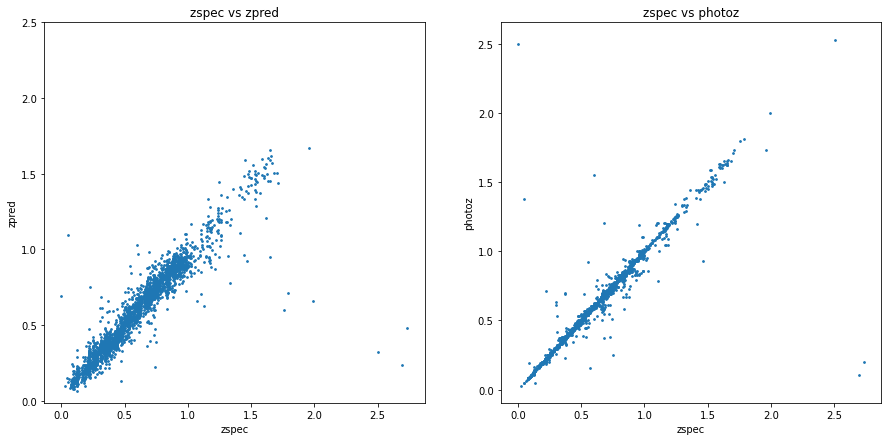

In [41]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
ax[0].scatter(TestDF['zspec'], TestDF['predz'],s=3)
ax[0].set_title('zspec vs zpred')
ax[0].set_xticks([0,0.5,1,1.5,2,2.5])
ax[0].set_yticks([0,0.5,1,1.5,2,2.5])
ax[0].set_xlabel('zspec')
ax[0].set_ylabel('zpred')

ax[1].scatter(TestDF['zspec'], TestDF['photoz'],s=3)
ax[1].set_title('zspec vs photoz')
ax[1].set_xticks([0,0.5,1,1.5,2,2.5])
ax[1].set_yticks([0,0.5,1,1.5,2,2.5])
ax[1].set_xlabel('zspec')
ax[1].set_ylabel('photoz')